# ***Forecasting Campaign Performance***

Author: Lulu Osofisan

Goal: Simulate performance data and build a simple forecasting model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# ---- Generate synthetic time-series data ---
np.random.seed(42)
days = np.arange(1, 31)
true_trend = 200 + 5 * days    # upward trend
noise = np.random.normal(0, 20, size=len(days))    # random noise
performance = true_trend + noise

data = pd.DataFrame({
    "day": days,
    "performance": performance
})

display(data.head())

,day,performance
0,1,214.934283
1,2,207.234714
2,3,227.953771
3,4,250.460597
4,5,220.316933


In [4]:
# ----- Split into train/test ----
train = data.iloc[:24]
test = data.iloc[24:]

X_train, y_train = train[["day"]], train["performance"]
X_test, y_test = test[["day"]], test["performance"]

# ---- Train model ----
model = LinearRegression().fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)


In [5]:
# ---- Evaluate ----
mae = mean_absolute_error(y_test, pred_test)
r2 = r2_score(y_test, pred_test)

print(f"MAE: {mae:.2f}, R²: {r2:.3f}")


MAE: 14.08, R²: -0.476


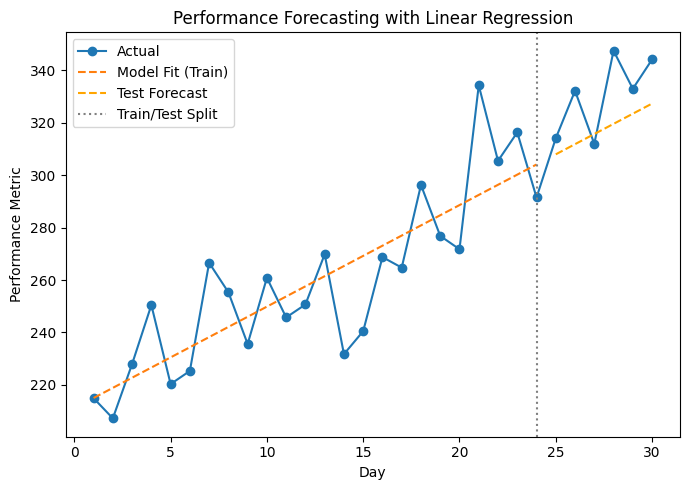

In [8]:
# ---- Plot forecast ----
plt.figure(figsize=(7, 5))
plt.plot(data["day"], data["performance"], marker="o", label="Actual")
plt.plot(train["day"], pred_train, "--", label="Model Fit (Train)")
plt.plot(test["day"], pred_test, "--", label="Test Forecast", color = "orange")
plt.axvline(24, color="gray", linestyle=":", label="Train/Test Split")
plt.title("Performance Forecasting with Linear Regression")
plt.xlabel("Day")
plt.ylabel("Performance Metric")
plt.legend()
plt.tight_layout()
plt.savefig("forecast_line.png")
plt.show()

In [9]:
# ---- Interpretation ----
coef = model.coef_[0]
intercept = model.intercept_

print(f"Trend coefficient: {coef: .2f}, intercept: {intercept:.2f}")
print("Interpretation: Performance increases roughly 5 units per day on average.")

Trend coefficient:  3.87, intercept: 211.12
Interpretation: Performance increases roughly 5 units per day on average.
